In [1]:
import pandas as pd
import numpy as np
import pylab as plt
import tensorflow as tf

In [2]:
data = pd.read_csv("datasets/heart/heart.csv")
data = data.sample(frac=1).reset_index(drop=True)

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
1,43,1,0,110,211,0,1,161,0,0.0,2,0,3,1
2,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
3,67,1,0,100,299,0,0,125,1,0.9,1,2,2,0
4,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1


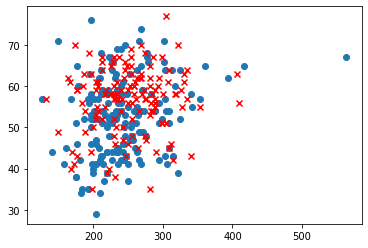

In [3]:
plt.scatter(data[data.target == 1]["chol"], data[data.target == 1]["age"], marker="o")

plt.scatter(data[data.target == 0]["chol"], data[data.target == 0]["age"], marker="x", color="red")

In [4]:
y = data["target"]

features = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]
X = pd.get_dummies(data[features])

y = np.array([y]).T
X = np.array(X)

X_train = tf.constant(X[:(int(len(X)*0.75)), :])
X_val = tf.constant(X[(int(len(X)*0.75)):, :])
y_train = tf.constant(y[:(int(len(X)*0.75)), :])
y_val = tf.constant(y[(int(len(X)*0.75)):, :])

2021-10-13 18:17:49.118327: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
X_train = tf.keras.utils.normalize(X_train)
X_val = tf.keras.utils.normalize(X_val)

In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(4, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics=["accuracy"])

model.fit(X_train, y_train, epochs=1000)

ch 801/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.3640 - accuracy: 0.8634
Epoch 802/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.3625 - accuracy: 0.8678
Epoch 803/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.3637 - accuracy: 0.8634
Epoch 804/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.3648 - accuracy: 0.8590
Epoch 805/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.3613 - accuracy: 0.8678
Epoch 806/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.3612 - accuracy: 0.8634
Epoch 807/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.3629 - accuracy: 0.8546
Epoch 808/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.3638 - accuracy: 0.8590
Epoch 809/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.3623 - accuracy: 0.8634
Epoch 810/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.3639 - accuracy: 0.8634
Epo

In [14]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(val_loss, val_acc)

3/3 [==============================] - 0s 1ms/step - loss: 0.4134 - accuracy: 0.8289
0.4134393334388733 0.8289473652839661
